🌟 Exercise 1: Calculating Required Sample Size
You are planning an A/B test to evaluate the impact of a new email subject line on the open rate. Based on past data, you expect a small effect size of 0.3 (an increase from 20% to 23% in the open rate). You aim for an 80% chance (power = 0.8) of detecting this effect if it exists, with a 5% significance level (α = 0.05).

Calculate the required sample size per group using Python’s statsmodels library.
What sample size is needed for each group to ensure your test is properly powered?

In [2]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
import numpy as np

# Define parameters
baseline_conversion = 0.20  # 20% open rate in Control group
expected_conversion = 0.23  # 23% open rate in Treatment group
alpha = 0.05  # Significance level
power = 0.8  # Desired power

# Calculate the effect size
effect_size = proportion_effectsize(baseline_conversion, expected_conversion)

# Calculate required sample size
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

print(f"Required sample size per group: {int(np.ceil(sample_size))}")


Required sample size per group: 2941


🌟 Exercise 2: Understanding the Relationship Between Effect Size and Sample Size
Using the same A/B test setup as in Exercise 1, you want to explore how changing the expected effect size impacts the required sample size.

Calculate the required sample size for the following effect sizes: 0.2, 0.4, and 0.5, keeping the significance level and power the same.
How does the sample size change as the effect size increases? Explain why this happens.

Effect Size Increment: 0.02, Effect Size: -0.0491, Required Sample Size per Group: 6508
Effect Size Increment: 0.04, Effect Size: -0.0967, Required Sample Size per Group: 1681
Effect Size Increment: 0.05, Effect Size: -0.1199, Required Sample Size per Group: 1092


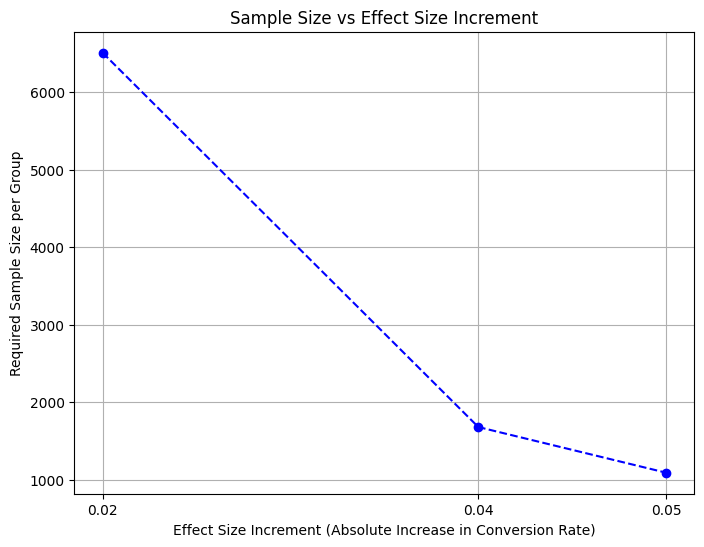

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
baseline_conversion = 0.20  # 20% open rate in Control group
alpha = 0.05  # Significance level
power = 0.8  # Desired power

# Define effect size increments (percentage points increase in conversion rate)
effect_size_increments = [0.02, 0.04, 0.05]  # Absolute increase: 2%, 4%, 5%

# Create a list to store the required sample sizes and corresponding effect sizes
sample_sizes = []
effect_sizes = []

# Calculate sample sizes for each effect size increment
for increment in effect_size_increments:
    expected_conversion = baseline_conversion + increment  # Calculate expected conversion rate
    effect_size = proportion_effectsize(baseline_conversion, expected_conversion)  # Calculate proportion effect size
    effect_sizes.append(effect_size)  # Store the effect size for visualization

    # Calculate required sample size using proportion-based effect size
    sample_size = NormalIndPower().solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

    # Append the sample size (rounded up) to the list
    sample_sizes.append(int(np.ceil(sample_size)))
    print(f"Effect Size Increment: {increment}, Effect Size: {effect_size:.4f}, Required Sample Size per Group: {int(np.ceil(sample_size))}")

# Visualizing the change in sample size as effect size increases
plt.figure(figsize=(8, 6))
plt.plot(effect_size_increments, sample_sizes, marker='o', linestyle='--', color='b')
plt.title('Sample Size vs Effect Size Increment')
plt.xlabel('Effect Size Increment (Absolute Increase in Conversion Rate)')
plt.ylabel('Required Sample Size per Group')
plt.xticks(effect_size_increments)  # Set x-ticks to match the effect size increments
plt.grid()
plt.show()


🌟 Exercise 3: Exploring the Impact of Statistical Power
Imagine you are conducting an A/B test where you expect a small effect size of 0.2. You initially plan for a power of 0.8 but wonder how increasing or decreasing the desired power level impacts the required sample size.

Calculate the required sample size for power levels of 0.7, 0.8, and 0.9, keeping the effect size at 0.2 and significance level at 0.05.
Question: How does the required sample size change with different levels of statistical power? Why is this understanding important when designing A/B tests?

Power: 0.7, Required Sample Size per Group: 309
Power: 0.8, Required Sample Size per Group: 393
Power: 0.9, Required Sample Size per Group: 526


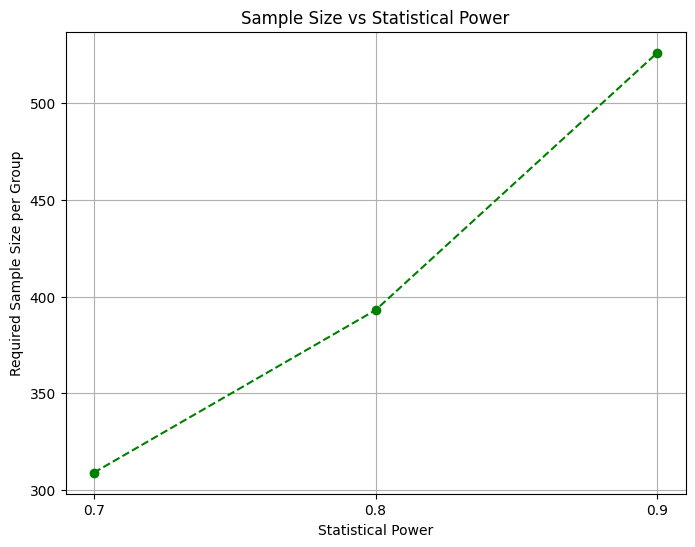

In [6]:

# Define parameters
effect_size = 0.2  # Fixed effect size
alpha = 0.05  # Significance level
power_levels = [0.7, 0.8, 0.9]  # Different power levels to explore

# Create a list to store the required sample sizes
sample_sizes = []

# Calculate sample sizes for each power level
for power in power_levels:
    # Calculate required sample size using the specified power level
    sample_size = NormalIndPower().solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

    # Append the calculated sample size to the list
    sample_sizes.append(int(np.ceil(sample_size)))
    print(f"Power: {power}, Required Sample Size per Group: {int(np.ceil(sample_size))}")

# Visualizing the change in sample size as power increases
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='--', color='g')
plt.title('Sample Size vs Statistical Power')
plt.xlabel('Statistical Power')
plt.ylabel('Required Sample Size per Group')
plt.xticks(power_levels)  # Setting x-ticks for power levels
plt.grid()
plt.show()


Higher Power = Lower Type II Error (β)
Power is defined as 1 - β. As we increase the power, we decrease the probability of a Type II error, meaning we are less likely to miss a real effect. To achieve this lower error rate, we need a larger sample size.

🌟 Exercise 4: Implementing Sequential Testing
You are running an A/B test on two versions of a product page to increase the purchase rate. You plan to monitor the results weekly and stop the test early if one version shows a significant improvement.

Define your stopping criteria.
Decide how you would implement sequential testing in this scenario.
At the end of week three, Version B has a p-value of 0.02. What would you do next?

Stop Early if: The p-value is below the adjusted significance level (e.g., 0.05) and remains consistent for multiple checks.
Continue Testing if: The p-value is above the significance level or fluctuates without clear direction.
Terminate Test: If the maximum test duration or sample size is reached without a conclusive result.

We didn't learn this but it's good to use a Stopping Rule: Use a method like Alpha Spending (adjusting significance level over time) or O'Brien-Fleming to control the false positive rate.

If 0.02 is below the adjusted significance level (e.g., 0.016 at Week 3 in an O'Brien-Fleming test), stop the test early and declare Version B as the winner.
If not, continue testing until the next checkpoint.

🌟 Exercise 5: Applying Bayesian A/B Testing
You’re testing a new feature in your app, and you want to use a Bayesian approach. Initially, you believe the new feature has a 50% chance of improving user engagement. After collecting data, your analysis suggests a 65% probability that the new feature is better.

Describe how you would set up your prior belief.
After collecting data, how does the updated belief (posterior distribution) influence your decision?
What would you do if the posterior probability was only 55%?

I guess I'd start with a 50% probability that the new feature improves user engagement (neutral assumption with no strong preference).

After collecting data, update the prior to a 65% probability that the new feature is better.

65% Probability Indicates moderate confidence. Proceed cautiously (e.g., a larger test or gradual rollout). 55% is inconclusive.

🌟 Exercise 6: Implementing Adaptive Experimentation
You’re running a test with three different website layouts to increase user engagement. Initially, each layout gets 33% of the traffic. After the first week, Layout C shows higher engagement.

Explain how you would adjust the traffic allocation after the first week.
Describe how you would continue to adapt the experiment in the following weeks.
What challenges might you face with adaptive experimentation, and how would you address them?

After Week 1 increase traffic to layout C (e.g., 50%) since it shows higher engagement. Decrease traffic for layouts A and B to 25% each.

Ongoing Adjustments - gradually shift more traffic to the better-performing layout(s) while reducing exposure to the lower-performing ones. Continuously favor the top performer

Challenges:
Bias - early winners may receive more traffic, leading to false positives. Address this by using Thompson Sampling or Bayesian Bandits to balance exploration and exploitation.
Changing Conversion Rates Over Time: User behavior may simply change since the beggining of the test; monitor stability and reset priors if needed.